In [2]:
from matplotlib import pyplot as plt
import numpy as np
import networkx as nx
import pandas as pd

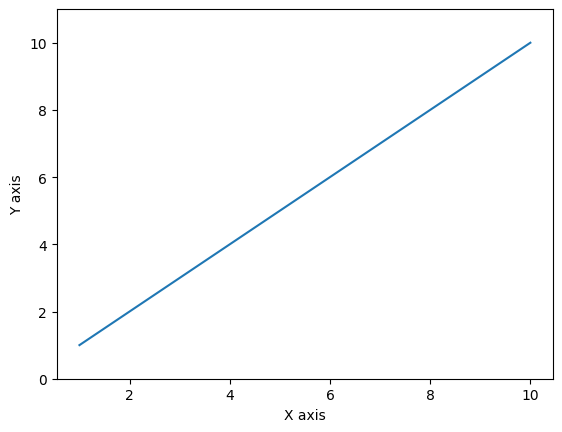

In [69]:
k = np.array([1,2,3,4,5,6,7,8,9,10])

fig,ax = plt.subplots()
ax.plot(k,k)
ax.set_xlabel("X axis")
ax.set_ylabel("Y axis")
ax.set_ylim([0,11])
plt.show()


def generate_user_follow_suggestions(user):
    logged_user = user.user.username
    social_g = {
    }
    profiles = Profile.objects.all()
    
    Social = nx.Graph()
    
    # Get list of usernames
    usernames = []
    for profile in profiles:
        usernames.append(profile.user.username)
    # Print usernames  
    #print(usernames)
    # Create graph from usernames 
    Social.add_nodes_from(usernames)
    # Verify node count
    #print(len(Social.nodes())) 
    # Add edges
    for profile in profiles:
        username = profile.user.username
        followers = profile.followers.all()
        social_g[username] = list(followers)
    
    for key, value in social_g.items():
        social_g[key] = [str(v).removeprefix("<User: ") for v in value]
    for user, followers in social_g.items():
        for follower in followers:
            Social.add_edge(user, follower)
    #print(Social.edges)
    
    suggestions = []
    degree_centrality = nx.degree_centrality(Social)
    eigenvector_centrality = nx.eigenvector_centrality(Social, max_iter=1000)
    sorted_users = sorted(eigenvector_centrality.items(), key=lambda x: x[1], reverse=True)
    user_to_recommend = logged_user
    print(degree_centrality)

    
    if(degree_centrality[user_to_recommend] == 0.0): # for cold start case
        print("case 1 triggered")
        print(list(nx.articulation_points(Social)))
        suggestions += list(nx.articulation_points(Social))
        for user, centrality in sorted_users:
            if user != user_to_recommend and Social.has_edge(user_to_recommend, user) == False and user not in suggestions:
                suggestions.append(user)
                if len(suggestions) >= 5:  # Limit the number of recommendations
                    break

    else:
        print("case 1 triggered")
        pagerank_scores = nx.pagerank(Social)
        print("pg", pagerank_scores)
        #neighbours = list(Social.neighbors(logged_user))
        n = 5
        #print(neighbours)
        neighbours_sorted = sorted(Social,
            key= lambda x: pagerank_scores[x], reverse=True)
        print(neighbours_sorted)
        neighbours_sorted.remove(user_to_recommend)
        suggestions += neighbours_sorted[:n]

    return suggestions[:3]

##### first workout for cold start
one way is to recommend the popular nodes to the new node

In [29]:

def FoFs(user : str, Graph : nx.Graph) -> set:

    """
    This function calcuates the first degree mutual friends and will return set of those users.

    Returns:
        set: set of second degree friends
    """
    if user not in Graph.nodes():
        print("na")
        raise(Exception("No such user"))
    connection = list(Graph.neighbors(user)) # stores the list of neighbors
    mutconnlist = list(set(Graph.neighbors(x)) for x in connection) # stores the list of list of neigbors 
    
    # create a set to store all connections
    totalconn = set()
    for friends in mutconnlist:
        for indivdual in friends:
            totalconn.add(indivdual)
            
    # remove already known connections
    totalconn = totalconn - set(connection)
    totalconn.remove(user) # remove the user
    return totalconn  

In [35]:

def generate_user_follow_suggestions(user : str , G : nx.Graph) -> list:
    # find the degree centrality of user to check if the user is new or not
    degree = nx.degree_centrality(G)
    # dict of eigenvector_centrality
    eigenvector_centrality = nx.eigenvector_centrality(G, max_iter=1000)
    # sort the user list based on their eigenvector values
    sorted_users = sorted(eigenvector_centrality.items(), key= lambda a:a[1], reverse=True)
    
    # create a suggestion list
    suggestions = []
    
    user_degree = degree[user]
    if(user_degree == 0.0):
        print("Case 1 triggered")
        # print(nx.articulation_points(G))
        suggestions.extend(list(nx.articulation_points(G)))
        # suggest some users with high influence
        for useri, _ in sorted_users:
            if useri != user and G.has_edge(user, useri) == False and useri not in suggestions:
                suggestions.append(useri)
        return suggestions[:5]
    # User with few followers
    else:
        print('Case 2 triggered')
        # try to recommend friends of friends 
        suggestions.extend(FoFs(user, G))
        return suggestions[:5]
        


In [ ]:
def generate_graph(user):
    logged_user = user.user.username
    socail_g = {}
    profiles = Profile.objects.all()
    
    Social = nx.Graph()
    # Get list of usernames
    usernames = []
    for profile in profiles:
        usernames.append(profile.user.username)
    # Print usernames  
    #print(usernames)
    # Create graph from usernames 
    Social.add_nodes_from(usernames)
    # Verify node count
    #print(len(Social.nodes())) 
    # Add edges
    for profile in profiles:
        username = profile.user.username
        followers = profile.followers.all()
        social_g[username] = list(followers)
    
    for key, value in social_g.items():
        social_g[key] = [str(v).removeprefix("<User: ") for v in value]
    for user, followers in social_g.items():
        for follower in followers:
            Social.add_edge(user, follower)
    #print(Social.edges)
    return [logged_user, Social]

In [4]:
# get the edge data from edges.txt and convert it to list
df = pd.read_csv("edges.txt", header=None)
# df_list = df.values.tolist()
df_list = [tuple(x) for x in df.itertuples(index=False)]
print(df_list)

[('Aryan', 'Adya'), ('Aryan', 'Vijay'), ('Aryan', 'Ragha'), ('Aryan', 'Abhay'), ('Aryan', 'Anu'), ('Aryan', 'Balaji'), ('Aryan', 'Nigga'), ('Aryan', 'Sahil'), ('Adya', 'Vijay'), ('Adya', 'Abhishek'), ('Adya', 'Balaji'), ('Adya', 'Sahil'), ('Vijay', 'Abhay'), ('Vijay', 'Abhishek'), ('Vijay', 'Ragha'), ('Vijay', 'Sahil'), ('Ragha', 'Abhay'), ('Ragha', 'Akash'), ('Abhishek', 'Abhay'), ('Abhay', 'Anu'), ('Abhay', 'Balaji'), ('Anu', 'Balaji'), ('Balaji', 'Akash'), ('Siddu', 'Sahil'), ('Siddu', 'Vikram'), ('Siddu', 'Tharun'), ('Vikram', 'Tharun')]


In [15]:
graph = nx.Graph()
graph.add_edges_from(df_list)

suggestions = []
graph.add_node('v')
degree = nx.degree_centrality(graph)
degree = sorted(degree.items(), key= lambda a: a[1], reverse=True)
print(dict(degree))
print(dict(degree).keys())
eigenvector = nx.eigenvector_centrality(graph)
eigenvector = sorted(eigenvector.items(), key=lambda a:a[1], reverse=True)
print(dict(eigenvector))

g = nx.Graph()
print(list(nx.articulation_points(graph)))
suggestions.extend(list(nx.articulation_points(graph)))
# k = list(nx.articulation_points(g))


{'Aryan': 0.5714285714285714, 'Vijay': 0.42857142857142855, 'Abhay': 0.42857142857142855, 'Adya': 0.3571428571428571, 'Balaji': 0.3571428571428571, 'Ragha': 0.2857142857142857, 'Sahil': 0.2857142857142857, 'Anu': 0.21428571428571427, 'Abhishek': 0.21428571428571427, 'Siddu': 0.21428571428571427, 'Akash': 0.14285714285714285, 'Vikram': 0.14285714285714285, 'Tharun': 0.14285714285714285, 'Nigga': 0.07142857142857142, 'v': 0.0}
dict_keys(['Aryan', 'Vijay', 'Abhay', 'Adya', 'Balaji', 'Ragha', 'Sahil', 'Anu', 'Abhishek', 'Siddu', 'Akash', 'Vikram', 'Tharun', 'Nigga', 'v'])
{'Aryan': 0.4630011913492401, 'Vijay': 0.39295542164985947, 'Abhay': 0.3863096749529601, 'Adya': 0.33385556501627806, 'Balaji': 0.31184512358099425, 'Ragha': 0.27608288021317495, 'Sahil': 0.25286575582971105, 'Anu': 0.2354596398571892, 'Abhishek': 0.22571932372636255, 'Akash': 0.11922018310242298, 'Nigga': 0.0938876488554603, 'Siddu': 0.05717617993492049, 'Vikram': 0.014544560967778574, 'Tharun': 0.014544560967778574, 'v'

In [44]:
suggestions = generate_user_follow_suggestions('Adya', graph)
print(suggestions)

Case 2 triggered
['Akash', 'Nigga', 'Ragha', 'Abhay', 'Anu']
